# One-sample t-test

### Dataset creation

To create our dataset we need 25 datapoints whose height field has a mean of 162cm, a standard deviation of 2.36cm and follows a normal distribution. 

We’ll use scipy’s truncnorm function to help out with this. Truncnorm helps in creating a truncated normal distribution - a normal distribution with the x-values truncated from below, above or both ends. 

Since we’re dealing with height - a value which obviously can’t be between negative infinity and infinity - we need to set lower and upper boundaries, thus we’re using a truncated normal distribution. 

In [12]:
import scipy.stats as stats

lower, upper = 152.0, 173.0 # set the lower and upper bounds 
mu, sigma = 162.0, 2.60 # set the mean and standard deviation
dist = stats.truncnorm((lower - mu) / sigma, (upper - mu) / sigma, loc=mu, scale=sigma) # call the truncnorm function to create the distribution

values = dist.rvs(25) # get 25 random values from our truncated normal distribution

In [69]:
values

array([161.04932825, 157.94261787, 164.17888877, 163.54445848,
       160.06771059, 163.45707845, 168.07863143, 165.58424396,
       164.60559623, 162.37256999, 160.85236512, 159.47788765,
       160.31123408, 161.94652962, 163.24033249, 161.39577547,
       162.66344425, 163.54501256, 160.47064474, 159.17020422,
       164.70719276, 161.7344409 , 159.57127502, 162.96029709,
       158.41041088])

Next we want to assign an age to each height so that we have one more variable (though this is not required for the one-sample t-test, it'll be useful in the two-sample t-test). We'll use the random library to generate 25 values between 27 and 30.

In [95]:
import random
ages = [random.randint(27,30) for i in range (25)]

Now we need to combine the ages array and the heights array together to form a dataframe which we can then store in csv for future use.

In [101]:
import pandas as pd
df = pd.DataFrame({'age':ages, 'height':values})
df.to_csv("one-sample-t.csv", index=False)

### Reading and processing the dataset

In [5]:
data = pd.read_csv("one-sample-t.csv")
data.head()

,age,height
0,27,161.049328
1,27,157.942618
2,28,164.178889
3,29,163.544458
4,29,160.067711


In [6]:
data.height.mean()

162.053526834564

In [7]:
data.height.std()

2.4128517286126048

##### So the standard deviation of data.height is not 2.36, which is what we set it to be when we called scipy's truncnorm function. Why is that?

This is because when we call truncnorm, it creates an entire normal distribution which is the 'population'. The standard deviation that we set at that time is the standard deviation of the height of the population. However, data.height consists of only 25 values from the distribution and is our 'sample', hence the standard deviation of data.height is slightly different than the standard deviation of the population.

### Checking if data.height follows a normal distribution

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='height', ylabel='Density'>

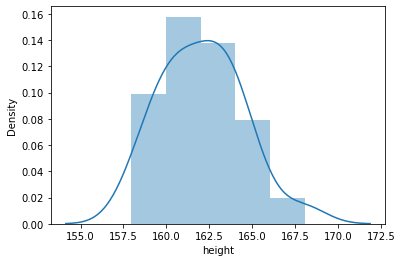

In [9]:
import seaborn as sns
sns.distplot(data.height) # plotting a histogram with a curve

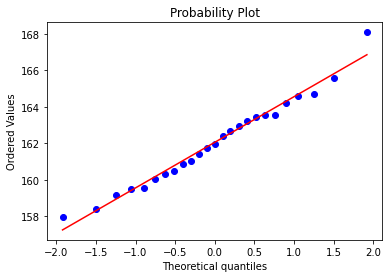

In [13]:
import pylab
stats.probplot(data.height, dist="norm", plot=pylab)
pylab.show() # plotting a probability plot

### Performing the t-test

In [11]:
stats.ttest_1samp(data.height,popmean=158.5)

Ttest_1sampResult(statistic=7.363748862859639, pvalue=1.32483697812078e-07)